In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'

In [32]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing("KRX")
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,77600,2,-400,-0.51,79000,79000,77500,13151889,1028553770200,463255125880000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,173200,2,-400,-0.23,177000,177500,173200,2336256,408840628653,126090009618000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,391000,1,2000,0.51,391000,394000,387000,121565,47535663000,91494000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,771000,2,-4000,-0.52,779000,781000,771000,56064,43419273679,54875154000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,64600,2,-400,-0.62,65700,65700,64600,489281,31830684600,53158480820000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,413300,KR7413300005,티엘엔지니어링,KONEX,일반기업부,2265,1,285,14.39,2265,2265,2265,1,2265,2956991475,1305515,KNX
2801,217320,KR7217320001,썬테크,KONEX,일반기업부,2400,0,0,0.00,0,0,0,0,0,2520000000,1050000,KNX
2802,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1400,2,-99,-6.60,1498,1498,1280,350,457145,2211944000,1579960,KNX
2803,030790,KR7030790000,비케이탑스,KOSPI,,53,2,-7,-11.67,61,61,48,10966230,555474816,1126151685,21248145,STK


In [33]:
import FinanceDataReader as fdr

stock = fdr.DataReader('005930')
stock.tail

<bound method NDFrame.tail of              Open   High    Low  Close    Volume    Change
Date                                                      
2000-01-13   5600   5740   5560   5710    823830       NaN
2000-01-14   5720   5880   5680   5830    987576  0.021016
2000-01-17   6000   6180   5920   6100   1270138  0.046312
2000-01-18   6160   6160   5980   6100    905231  0.000000
2000-01-19   6000   6040   5960   5960    804159 -0.022951
...           ...    ...    ...    ...       ...       ...
2024-04-26  77800  77900  76500  76700  12755629  0.005242
2024-04-29  77400  77600  76200  76700  14664474  0.000000
2024-04-30  77000  78500  76600  77500  19007007  0.010430
2024-05-02  77600  78600  77300  78000  18900640  0.006452
2024-05-03  79000  79000  77500  77600  13056919 -0.005128

[6000 rows x 6 columns]>

In [34]:
stock.index

DatetimeIndex(['2000-01-13', '2000-01-14', '2000-01-17', '2000-01-18',
               '2000-01-19', '2000-01-20', '2000-01-21', '2000-01-24',
               '2000-01-25', '2000-01-26',
               ...
               '2024-04-19', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-29', '2024-04-30',
               '2024-05-02', '2024-05-03'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

Text(0, 0.5, 'price')

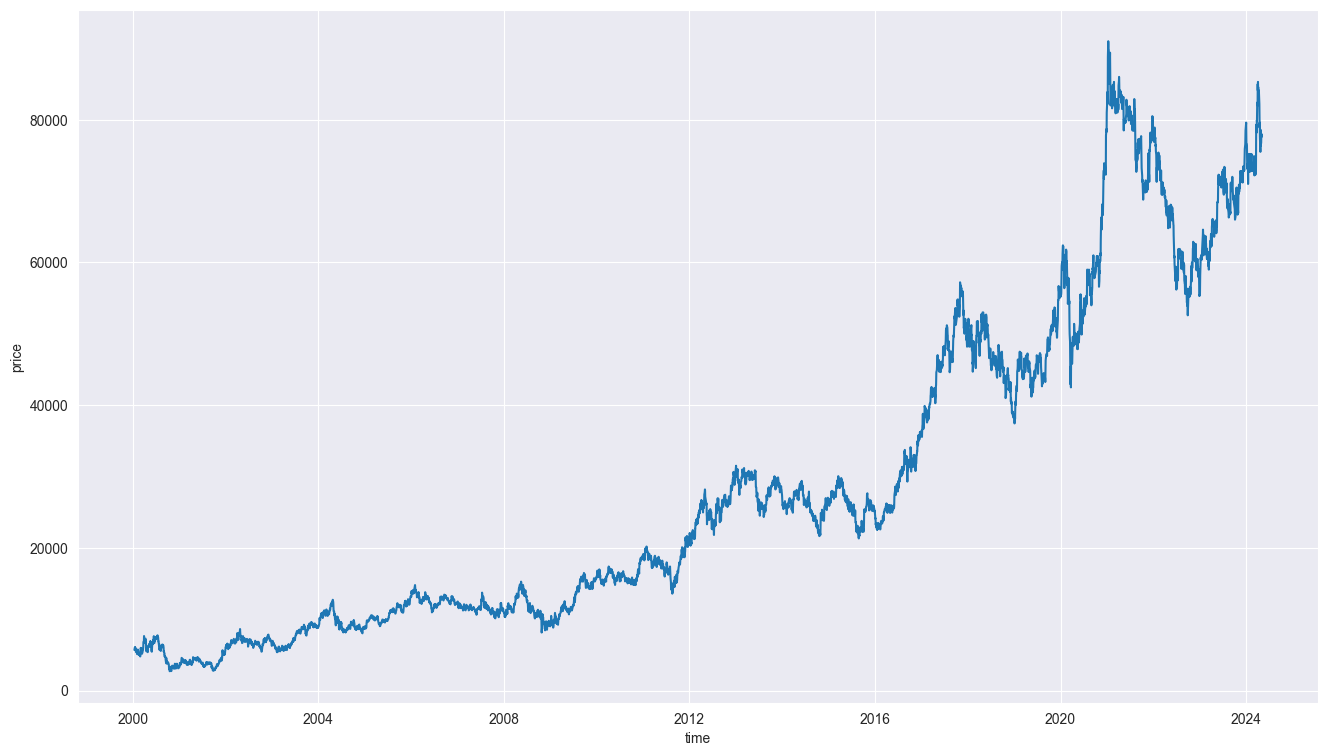

In [21]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

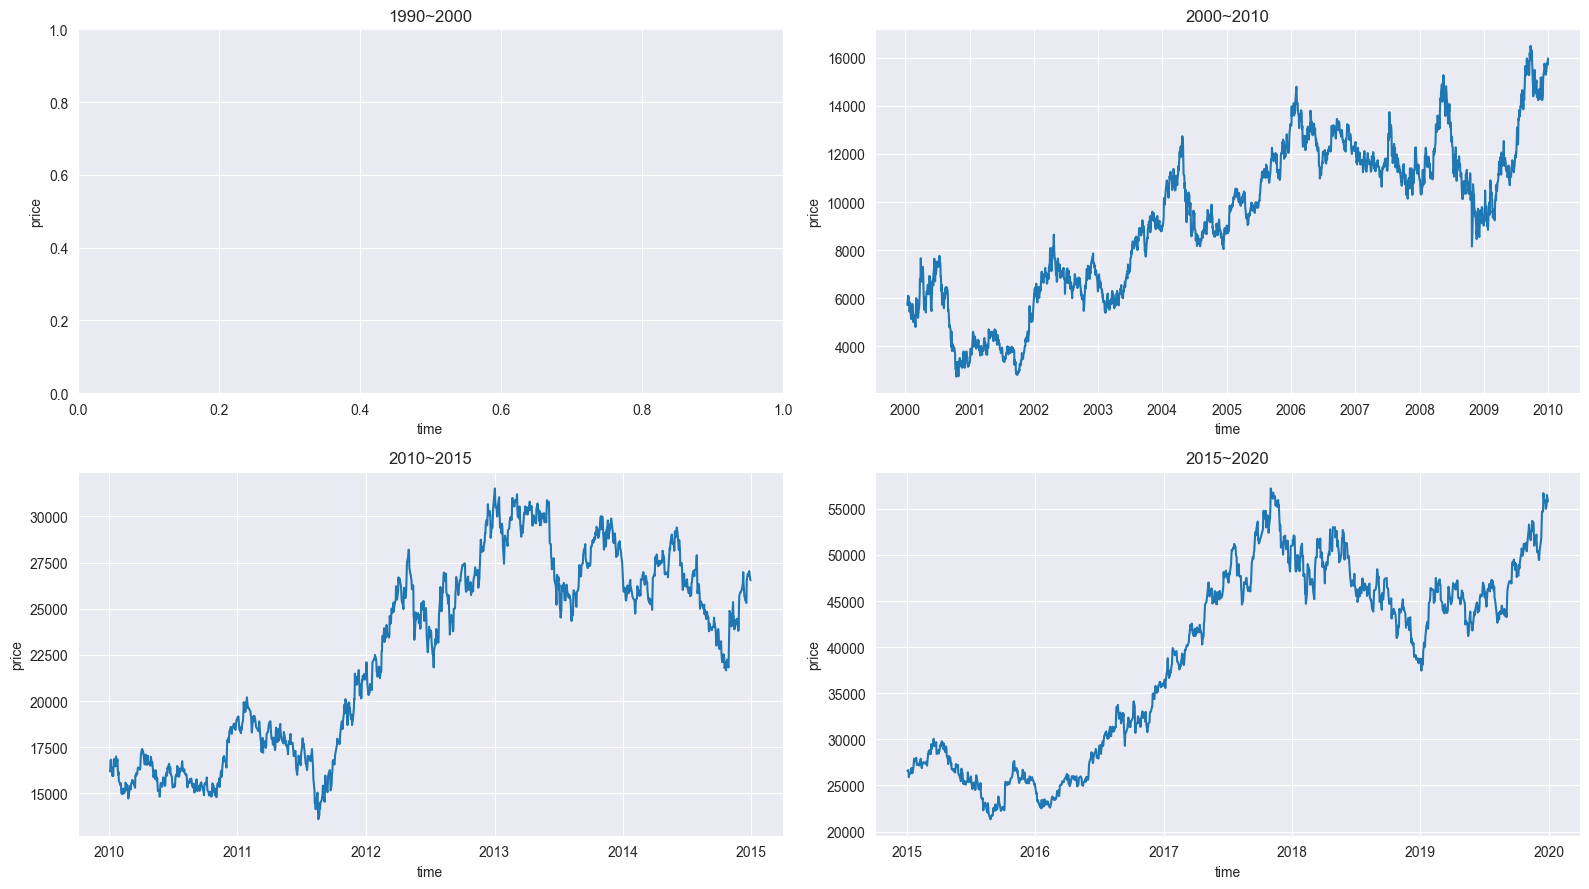

In [22]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.0620155 , 0.05929752, 0.06212291, 0.03376005, 0.00912263],
       [0.06334441, 0.0607438 , 0.06346369, 0.03511952, 0.01093586],
       [0.06644518, 0.06384298, 0.06614525, 0.03817832, 0.0140648 ],
       ...,
       [0.85271318, 0.81095041, 0.85586592, 0.84706016, 0.21047294],
       [0.8593577 , 0.81198347, 0.86368715, 0.85272459, 0.2092951 ],
       [0.87486157, 0.8161157 , 0.86592179, 0.84819304, 0.144585  ]])

In [24]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.shape

(6000, 5)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns= ['Close']), df['Close'], test_size=0.2, random_state=0, shuffle=False)

x_train.shape, y_train.shape
#x_test.shape, y_test.shape
#x_train

((4800, 4), (4800,))

In [26]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)



In [40]:
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.weights.h5')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])


Epoch 1/50
    150/Unknown - 1s 3ms/step - loss: 2.4537e-04 - mse: 4.9074e-04
Epoch 1: val_loss improved from inf to 0.00450, saving model to tmp/ckeckpointer.weights.h5
150/150 [==============================] - 1s 5ms/step - loss: 2.4537e-04 - mse: 4.9074e-04 - val_loss: 0.0045 - val_mse: 0.0090
Epoch 2/50
139/150 [==========================>...] - ETA: 0s - loss: 5.1282e-05 - mse: 1.0256e-04
Epoch 2: val_loss did not improve from 0.00450
150/150 [==============================] - 1s 3ms/step - loss: 5.5175e-05 - mse: 1.1035e-04 - val_loss: 0.0046 - val_mse: 0.0092
Epoch 3/50
139/150 [==========================>...] - ETA: 0s - loss: 4.7053e-05 - mse: 9.4106e-05
Epoch 3: val_loss improved from 0.00450 to 0.00360, saving model to tmp/ckeckpointer.weights.h5
150/150 [==============================] - 1s 3ms/step - loss: 5.3613e-05 - mse: 1.0723e-04 - val_loss: 0.0036 - val_mse: 0.0072
Epoch 4/50
138/150 [==========================>...] - ETA: 0s - loss: 4.8793e-05 - mse: 9.7585e-05
Epo

In [42]:
model.load_weights(filename)
pred = model.predict(test_data)
pred.shape

37/37 [==============================] - 0s 1ms/step


(1180, 1)

hella


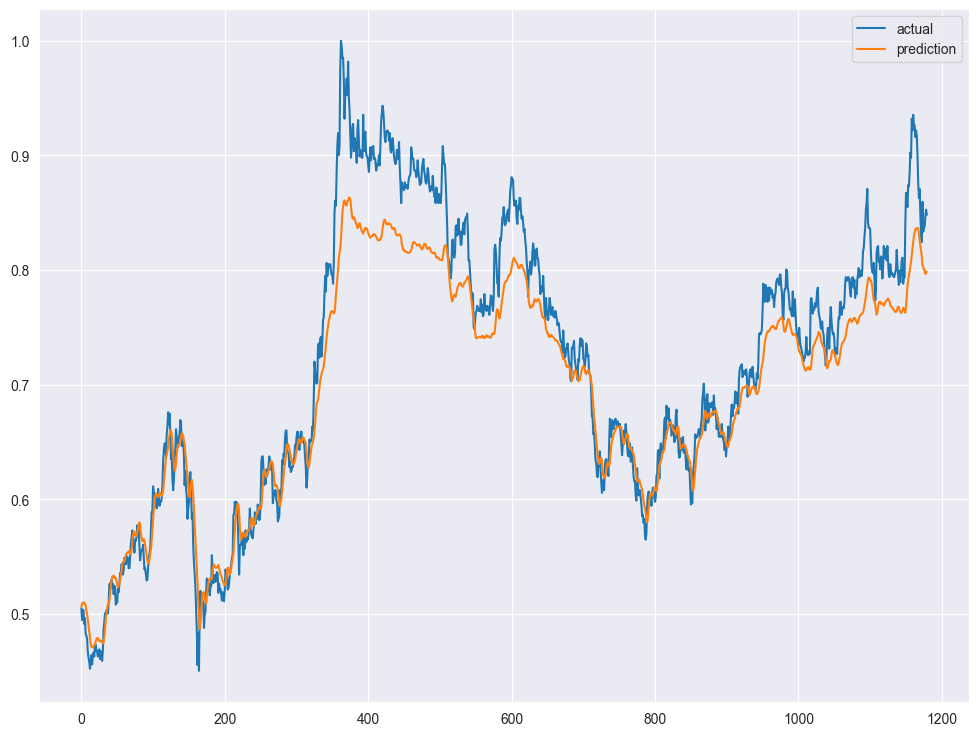

In [43]:
print('hella')
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()
